<a href="https://colab.research.google.com/github/ilirsheraj/AutoEncoders-GANs/blob/main/Chpt_01_Basics_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1: Coding a Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [3]:
Y = np.array([0,1,1,0])
print(X.shape)
print(Y.shape)

(4, 2)
(4,)


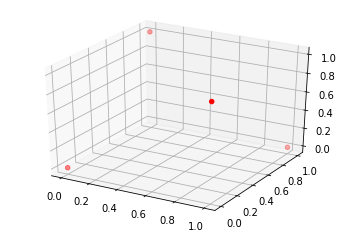

In [4]:
# Plot the whole thing
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], Y, X[:,1], c='r', marker='o')
plt.show()

In [5]:
# Initializ e the weights
no_of_inputs = X.shape[1]
weights = np.random.rand(no_of_inputs + 1)
print(weights)
print()
print(weights.shape)

[0.65512013 0.46718012 0.6137116 ]

(3,)


In [8]:
# Take the dot product
for i in range(len(X)):
    inputs = X[i]
    print(inputs)
    summation = np.dot(inputs,weights[1:]) + weights[0]
    print(summation)

[0 0]
0.6551201279351921
[0 1]
1.2688317248039254
[1 0]
1.1223002488615306
[1 1]
1.7360118457302638


In [10]:
# Train the Perceptron
learning_rate = 0.1
epochs = 100
history = []

for _ in range(epochs):
    for inputs, label in zip(X,Y):
        prediction = np.dot(inputs, weights[1:]) + weights[0]
        loss = label - prediction
        history.append(loss*loss)
        print("loss = {}".format(loss*loss))
        weights[1:] += learning_rate * loss * inputs
        weights[0] += learning_rate*loss

loss = 0.42918238202582254
loss = 0.04133890529199452
loss = 0.0013290592480507328
loss = 2.6326511008788316
loss = 0.1627122406968171
loss = 0.042368619349598124
loss = 0.09928667524871125
loss = 1.4391133252001542
loss = 0.08712463582896084
loss = 0.16208861620096612
loss = 0.23161220473179242
loss = 0.9741633474515565
loss = 0.06519778325115388
loss = 0.2468987006082592
loss = 0.311646665499778
loss = 0.768063969786847
loss = 0.061345221605652644
loss = 0.2934739721330027
loss = 0.3510276078142984
loss = 0.6651193338976567
loss = 0.0649116663017082
loss = 0.31666031121039634
loss = 0.3675942936400398
loss = 0.6071689096279866
loss = 0.07197469593023578
loss = 0.32743717346405876
loss = 0.3726913267981609
loss = 0.5702671702413354
loss = 0.08077387008878782
loss = 0.3319849783936456
loss = 0.37237123105870884
loss = 0.5438653040288575
loss = 0.09040836587287925
loss = 0.3334892773557049
loss = 0.3696539381459094
loss = 0.5231021197437887
loss = 0.10038363121519223
loss = 0.3335340228

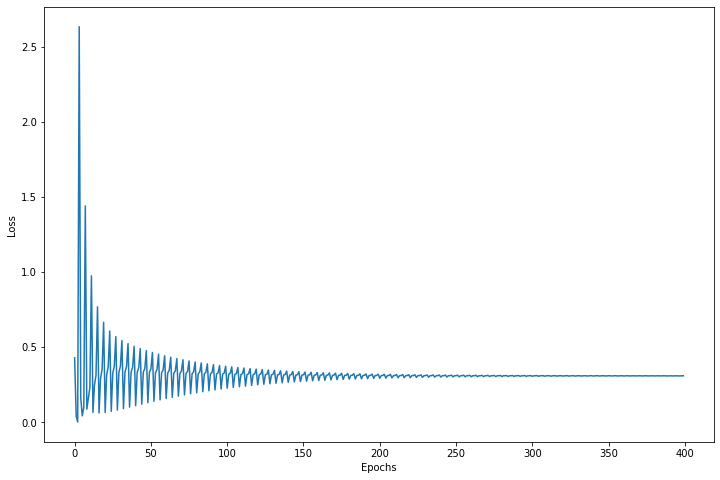

In [16]:
figure = plt.figure(figsize=(12,8))
plt.plot(history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Exercise 2: Linear Regression With Perceptron

In [35]:
# Define another dataset
X = np.array([[1,2,3],[3,4,5],[5,6,7],[7,8,9],[9,8,7]])
Y = np.array([1,2,3,4,5])
print(X.shape)
print(Y.shape)

(5, 3)
(5,)


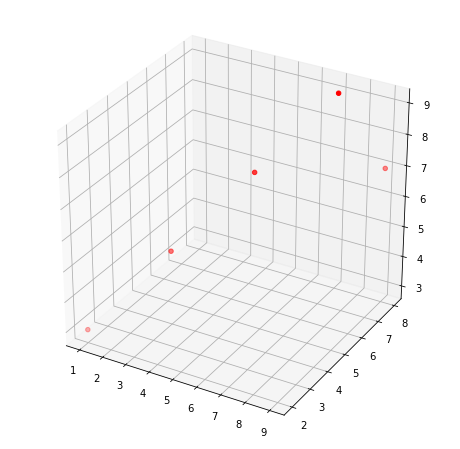

In [36]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], X[:,2], c="r", marker="o")
plt.show()

In [63]:
no_of_inputs = X.shape[1]
epochs = 50
learning_rate = 0.01
weights = np.random.rand(no_of_inputs +1)
print(weights)

[0.53531906 0.73980754 0.79578599 0.22081362]


In [42]:
# Define a custom-made activation function
def relu_activation(sum):
    if sum > 0:
        return sum
    else:
        return 0

In [70]:
# Define a class, much more efficient
class Perceptron(object):
    def __init__(self, no_of_inputs, activation):
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
        self.activation = activation

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation(summation)

    def train(self, training_inputs, training_labels, epochs = 100, learning_rate = 0.01):
        history = []
        for _ in range(epochs):
            for inputs, labels in zip(training_inputs, training_labels):
                prediction = self.predict(inputs)
                loss = (label - prediction)
                loss2 = loss*loss
                history.append(loss2)
                #print("loss = {}".format(loss))
                self.weights[1:] += self.learning_rate * loss * inputs
                self.weights[0] += self.learning_rate * loss
        return history

In [71]:
# Instantiate the class
perceptron = Perceptron(no_of_inputs, relu_activation)
history = perceptron.train(X,Y, epochs=epochs)

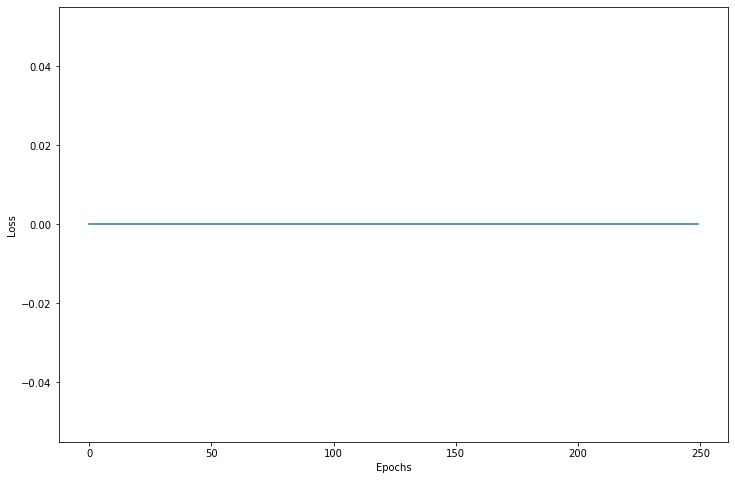

In [72]:
figure = plt.figure(figsize=(12,8))
plt.plot(history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()